In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
#image directories
train_dir = "C:/Users/User/Desktop/NTU Projects/Intel Image Classification/Intel Images/seg_train/seg_train"
valid_dir = "C:/Users/User/Desktop/NTU Projects/Intel Image Classification/Intel Images/seg_test/seg_test"
pred_dir = "C:/Users/User/Desktop/NTU Projects/Intel Image Classification/Intel Images/seg_pred"

In [ ]:
batch_num = 32
dim = 50
#create augementation for training
train_IDG = ImageDataGenerator(rescale = 1.0/255.0,
                              shear_range = 0.3,
                              zoom_range = 0.3,
                              horizontal_flip = True)
#training generator
train_gtr = train_IDG.flow_from_directory(directory = train_dir,
                                         target_size = (dim, dim),
                                         color_mode = 'rgb',
                                         batch_size = batch_num,
                                         class_mode = 'categorical',
                                         shuffle = True)

#create augmentation for validation 
valid_IDG = ImageDataGenerator(rescale = 1.0/255.0)
#validation generator
valid_gtr = valid_IDG.flow_from_directory(directory = valid_dir,
                                          target_size = (dim, dim),
                                          color_mode = 'rgb',
                                          batch_size = batch_num,
                                          class_mode = 'categorical',
                                          shuffle = True)

#create augmentation and generator for prediction
test_IDG = ImageDataGenerator(rescale = 1.0/255.0)
test_gtr = test_IDG.flow_from_directory(directory = pred_dir,
                                        target_size = (dim, dim),
                                        color_mode = 'rgb',
                                        batch_size = batch_num,
                                        class_mode = None,
                                        shuffle = True)

Found 14034 images belonging to 6 classes.


In [4]:
#build model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (dim, dim,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer = SGD(lr=0.001), loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
with tf.device("GPU:0"):
    history = model.fit(train_gtr,
                       steps_per_epoch = 14034//batch_num,
                       epochs = 40,
                       validation_data = valid_gtr,
                       validation_steps = 3000//batch_num)

Epoch 1/40
438/438 [==============================] - 367s 838ms/step - loss: 1.7808 - accuracy: 0.1951 - val_loss: 1.7713 - val_accuracy: 0.2110
Epoch 2/40
438/438 [==============================] - 26s 60ms/step - loss: 1.7627 - accuracy: 0.2259 - val_loss: 1.7482 - val_accuracy: 0.2534
Epoch 3/40
438/438 [==============================] - 26s 59ms/step - loss: 1.7341 - accuracy: 0.2620 - val_loss: 1.7034 - val_accuracy: 0.2819
Epoch 4/40
438/438 [==============================] - 25s 58ms/step - loss: 1.6831 - accuracy: 0.2943 - val_loss: 1.6288 - val_accuracy: 0.3384
Epoch 5/40
438/438 [==============================] - 25s 58ms/step - loss: 1.6102 - accuracy: 0.3462 - val_loss: 1.5276 - val_accuracy: 0.4002
Epoch 6/40
438/438 [==============================] - 25s 58ms/step - loss: 1.5288 - accuracy: 0.3907 - val_loss: 1.4594 - val_accuracy: 0.4506
Epoch 7/40
438/438 [==============================] - 25s 58ms/step - loss: 1.4622 - accuracy: 0.4299 - val_loss: 1.3849 - val_accurac

Training Accuracy: 0.599
Training Loss: 1.781
Validation Accuracy: 0.632
Validation Loss: 1.771


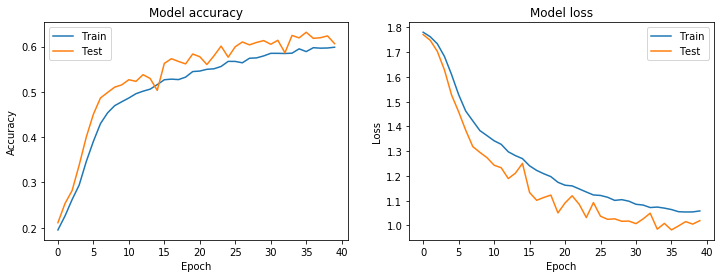

In [6]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
print('Training Accuracy: {:.3f}'.format(np.max(acc)))
print('Training Loss: {:.3f}'.format(np.max(loss)))
print('Validation Accuracy: {:.3f}'.format(np.max(val_acc)))
print('Validation Loss: {:.3f}'.format(np.max(val_loss)))
axes[0].plot(acc, label='Train')
axes[0].plot(val_acc, label='Test')
axes[0].set_title('Model accuracy')
axes[0].set(ylabel = 'Accuracy', xlabel = 'Epoch')
axes[0].legend()
axes[1].plot(loss, label='Train')
axes[1].plot(val_loss, label='Test')
axes[1].set_title('Model loss')
axes[1].set(ylabel = 'Loss', xlabel = 'Epoch')
axes[1].legend()
plt.show()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 32)        0